This notebook produces:  <ul>
    <li> scatter plots of the color-color distributions of objects in our test set </li>
    <li> histograms comparing the photo-z distributions of the 4 DES methods and our Nadaraya-Watson method trained on DES photometry </li>
    </ul>
The objects used are objects labelled as "stars" from GTR-ADM-QSO-ir-testhighz_findbw_lup_2016_starclean.fits that were also imaged in the DES science verificaton GOLD catalog.  

143,439 objects in gtr are sdss dr12 quasars (3897 of which are labelled as quasars) <br>
81,509 objects in gtr are sdss dr7 quasars (2273 of which are labelled as quasars) <br>
459142 objects in gtr have zspec = 0, all of which are labelled as stars <br>
689365 total objects in gtr are labelled as stars

3649 stars out of 689365 total matched to DES SVA1 gold <br>
1283 of those have zspec=0

In [1]:
import numpy as np
from astropy.table import Table
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report
from astroML.linear_model import NadarayaWatson
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import palettable
import richardsplot as rplot
%matplotlib inline

In [2]:
#read in table
destable_annz = Table.read('gtr_star+dessva1gold_annz.fits')
#prevent a bug involving MaskedColumns
destable_annz = destable_annz.filled()

In [3]:
destable_bpz = Table.read('gtr_star+dessva1gold_bpz.fits')
destable_bpz = destable_bpz.filled()

In [4]:
destable_skynet = Table.read('gtr_star+dessva1gold_skynet.fits')
destable_skynet = destable_skynet.filled()

In [5]:
destable_tpz = Table.read('gtr_star+dessva1gold_tpz.fits')
destable_tpz = destable_tpz.filled()

In [6]:
#stack together photometry bands, des photo-z, and des object class
X_annz = np.vstack([destable_annz['MAG_AUTO_G'], destable_annz['MAG_AUTO_R'], destable_annz['MAG_AUTO_I'], destable_annz['MAG_AUTO_Z'], destable_annz['Z_MEAN'], destable_annz['MODEST_CLASS'] ]).T
y_annz = np.array(destable_annz['zspec'])
#split into test and training sets of 1/5 and 4/5 size respectively
X_train_annz, X_test_annz, y_train_annz, y_test_annz = train_test_split(X_annz, y_annz, test_size=0.2, random_state=76)
#empty arrays for photometry bands
X_traintrue_annz = np.empty((X_train_annz.shape[0], X_train_annz.shape[1]-2), dtype=float) 
X_testtrue_annz = np.empty((X_test_annz.shape[0], X_test_annz.shape[1]-2), dtype=float)
#empty array for des photo-z
DesZs_annz = np.empty((X_test_annz.shape[0], 1), dtype=float) 
#empty array for des object class
ModestClass_annz = np.empty((X_test_annz.shape[0], 1), dtype=int)
#loop through to separate the photometry from the des photo-z and object class
for i in range(len(X_train_annz)):
    X_traintrue_annz[i] = X_train_annz[i][:4] 
for i in range(len(X_test_annz)):
    X_testtrue_annz[i] = X_test_annz[i][:4]
    DesZs_annz[i] = X_test_annz[i][4]
    ModestClass_annz[i] = X_test_annz[i][5] 
#initialize model with gaussian kernel of width 0.05
model_annz = NadarayaWatson('gaussian', 0.05)
#fit model to training set
model_annz.fit(X_traintrue_annz, y_train_annz)
#produce a photo-z estimate
pred_annz = model_annz.predict(X_testtrue_annz)

c:\python27\lib\site-packages\astroML\linear_model\kernel_regression.py:52: RuntimeWarning: invalid value encountered in divide
  return (K * self.y).sum(1) / K.sum(1)


In [7]:
X_bpz = np.vstack([destable_bpz['MAG_AUTO_G'], destable_bpz['MAG_AUTO_R'], destable_bpz['MAG_AUTO_I'], destable_bpz['MAG_AUTO_Z'], destable_bpz['Z_MEAN'], destable_bpz['MODEST_CLASS'] ]).T
y_bpz = np.array(destable_bpz['zspec'])
X_train_bpz, X_test_bpz, y_train_bpz, y_test_bpz = train_test_split(X_bpz, y_bpz, test_size=0.2, random_state=76)
X_traintrue_bpz = np.empty((X_train_bpz.shape[0], X_train_bpz.shape[1]-2), dtype=float) 
X_testtrue_bpz = np.empty((X_test_bpz.shape[0], X_test_bpz.shape[1]-2), dtype=float)
DesZs_bpz = np.empty((X_test_bpz.shape[0], 1), dtype=float) 
ModestClass_bpz = np.empty((X_test_bpz.shape[0], 1), dtype=int)

for i in range(len(X_train_bpz)):
    X_traintrue_bpz[i] = X_train_bpz[i][:4] 
for i in range(len(X_test_bpz)):
    X_testtrue_bpz[i] = X_test_bpz[i][:4]
    DesZs_bpz[i] = X_test_bpz[i][4]
    ModestClass_bpz[i] = X_test_bpz[i][5] 
    
model_bpz = NadarayaWatson('gaussian', 0.05)
model_bpz.fit(X_traintrue_bpz, y_train_bpz)
pred_bpz = model_bpz.predict(X_testtrue_bpz)

In [8]:
X_skynet = np.vstack([destable_skynet['MAG_AUTO_G'], destable_skynet['MAG_AUTO_R'], destable_skynet['MAG_AUTO_I'], destable_skynet['MAG_AUTO_Z'], destable_skynet['Z_MEAN'], destable_skynet['MODEST_CLASS'] ]).T
y_skynet = np.array(destable_skynet['zspec'])
X_train_skynet, X_test_skynet, y_train_skynet, y_test_skynet = train_test_split(X_skynet, y_skynet, test_size=0.2, random_state=76)
X_traintrue_skynet = np.empty((X_train_skynet.shape[0], X_train_skynet.shape[1]-2), dtype=float) 
X_testtrue_skynet = np.empty((X_test_skynet.shape[0], X_test_skynet.shape[1]-2), dtype=float)
DesZs_skynet = np.empty((X_test_skynet.shape[0], 1), dtype=float) 
ModestClass_skynet = np.empty((X_test_skynet.shape[0], 1), dtype=int)

for i in range(len(X_train_skynet)):
    X_traintrue_skynet[i] = X_train_skynet[i][:4] 
for i in range(len(X_test_skynet)):
    X_testtrue_skynet[i] = X_test_skynet[i][:4]
    DesZs_skynet[i] = X_test_skynet[i][4]
    ModestClass_skynet[i] = X_test_skynet[i][5] 
    
model_skynet = NadarayaWatson('gaussian', 0.05)
model_skynet.fit(X_traintrue_skynet, y_train_skynet)
pred_skynet = model_skynet.predict(X_testtrue_skynet)

In [9]:
X_tpz = np.vstack([destable_tpz['MAG_AUTO_G'], destable_tpz['MAG_AUTO_R'], destable_tpz['MAG_AUTO_I'], destable_tpz['MAG_AUTO_Z'], destable_tpz['Z_MEAN'], destable_tpz['MODEST_CLASS'] ]).T
y_tpz = np.array(destable_tpz['zspec'])
X_train_tpz, X_test_tpz, y_train_tpz, y_test_tpz = train_test_split(X_tpz, y_tpz, test_size=0.2, random_state=76)
X_traintrue_tpz = np.empty((X_train_tpz.shape[0], X_train_tpz.shape[1]-2), dtype=float) 
X_testtrue_tpz = np.empty((X_test_tpz.shape[0], X_test_tpz.shape[1]-2), dtype=float)
DesZs_tpz = np.empty((X_test_tpz.shape[0], 1), dtype=float) 
ModestClass_tpz = np.empty((X_test_tpz.shape[0], 1), dtype=int)

for i in range(len(X_train_tpz)):
    X_traintrue_tpz[i] = X_train_tpz[i][:4] 
for i in range(len(X_test_tpz)):
    X_testtrue_tpz[i] = X_test_tpz[i][:4]
    DesZs_tpz[i] = X_test_tpz[i][4]
    ModestClass_tpz[i] = X_test_tpz[i][5] 
    
model_tpz = NadarayaWatson('gaussian', 0.05)
model_tpz.fit(X_traintrue_tpz, y_train_tpz)
pred_tpz = model_tpz.predict(X_testtrue_tpz)

In [10]:
#initialize arrays for sorting
g_r_lowzspec0=[]
r_i_lowzspec0=[]
i_z_lowzspec0=[]
g_r_highzspec0=[]
r_i_highzspec0=[]
i_z_highzspec0=[]
g_r_lowzspec1 = []
r_i_lowzspec1 = []
i_z_lowzspec1 = []
g_r_highzspec1 = []
r_i_highzspec1 = []
i_z_highzspec1 = []
#loop through zspecs, check if zspec=0, then split by our NW prediction at 0.4
for i in range(len(y_test_annz)):
    if y_test_annz[i] == 0:
        if pred_annz[i] <= 0.4:
            g_r_lowzspec0 = np.append(g_r_lowzspec0, (X_testtrue_annz.T[0][i] - X_testtrue_annz.T[1][i]))
            r_i_lowzspec0 = np.append(r_i_lowzspec0, (X_testtrue_annz.T[1][i] - X_testtrue_annz.T[2][i]))
            i_z_lowzspec0 = np.append(i_z_lowzspec0, (X_testtrue_annz.T[2][i] - X_testtrue_annz.T[3][i]))
        else:
            g_r_highzspec0 = np.append(g_r_highzspec0, (X_testtrue_annz.T[0][i] - X_testtrue_annz.T[1][i]))
            r_i_highzspec0 = np.append(r_i_highzspec0, (X_testtrue_annz.T[1][i] - X_testtrue_annz.T[2][i]))
            i_z_highzspec0 = np.append(i_z_highzspec0, (X_testtrue_annz.T[2][i] - X_testtrue_annz.T[3][i]))
    else:
        if pred_annz[i] <= 0.4:
            #lowz and not stars
            g_r_lowzspec1 = np.append(g_r_lowzspec1, (X_testtrue_annz.T[0][i] - X_testtrue_annz.T[1][i]))
            r_i_lowzspec1 = np.append(r_i_lowzspec1, (X_testtrue_annz.T[1][i] - X_testtrue_annz.T[2][i]))
            i_z_lowzspec1 = np.append(i_z_lowzspec1, (X_testtrue_annz.T[2][i] - X_testtrue_annz.T[3][i]))
        else:
            #highz and not stars
            g_r_highzspec1 = np.append(g_r_highzspec1, (X_testtrue_annz.T[0][i] - X_testtrue_annz.T[1][i]))
            r_i_highzspec1 = np.append(r_i_highzspec1, (X_testtrue_annz.T[1][i] - X_testtrue_annz.T[2][i]))
            i_z_highzspec1 = np.append(i_z_highzspec1, (X_testtrue_annz.T[2][i] - X_testtrue_annz.T[3][i]))

133


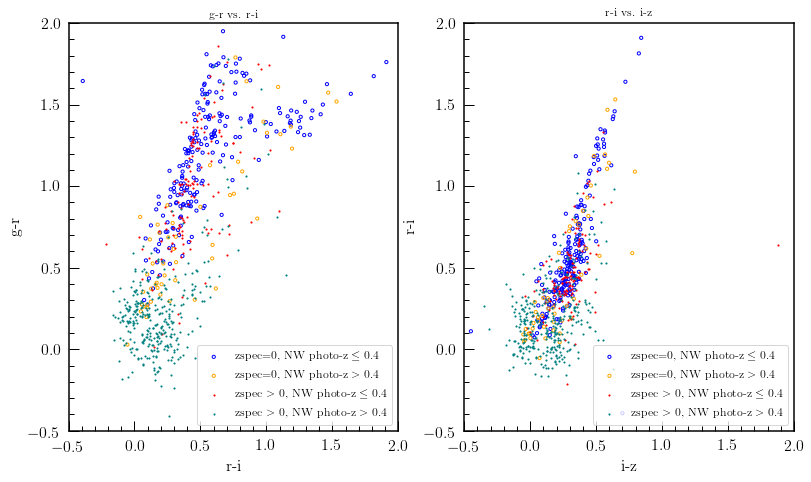

In [14]:
print len(i_z_lowzspec1)
plt.figure(figsize=(13,7.5))
plt.subplot(121)
plt.scatter(r_i_lowzspec0, g_r_lowzspec0, marker='o', facecolor='none', edgecolor='blue', s=10, label = 'zspec=0, NW photo-z $\leq$ 0.4')
plt.scatter(r_i_highzspec0, g_r_highzspec0, marker='o', facecolor='none', edgecolor='orange', s=10, label = 'zspec=0, NW photo-z $>$ 0.4')
plt.scatter(r_i_lowzspec1, g_r_lowzspec1, marker='.', color='red', s=5, label = 'zspec $>$ 0, NW photo-z $\leq$ 0.4')
plt.scatter(r_i_highzspec1, g_r_highzspec1, marker='.', s=5, color='teal', label = 'zspec $>$ 0, NW photo-z $>$ 0.4')
plt.xlim(-0.5,2)
plt.ylim(-0.5,2)
plt.xlabel('r-i')
plt.ylabel('g-r')
plt.title('g-r vs. r-i')
plt.legend(loc=4)
plt.subplot(122)
plt.scatter(i_z_lowzspec0, r_i_lowzspec0, marker='o', facecolor='none', edgecolor='blue', s=10, label = 'zspec=0, NW photo-z $\leq$ 0.4')
plt.scatter(i_z_highzspec0, r_i_highzspec0, marker='o', facecolor='none', edgecolor='orange', s=10, label = 'zspec=0, NW photo-z $>$ 0.4')
plt.scatter(i_z_lowzspec1, r_i_lowzspec1, marker='.', color='red', s=5, label='zspec $>$ 0, NW photo-z $\leq$ 0.4')
plt.scatter(i_z_highzspec1, r_i_highzspec1, marker='.', color='teal', s=5, label = 'zspec $>$ 0, NW photo-z $>$ 0.4')
plt.xlim(-0.5,2)
plt.ylim(-0.5,2)
plt.xlabel('i-z')
plt.ylabel('r-i')
plt.title('r-i vs. i-z')
plt.legend(loc=4)

Above scatter plots show the color-color distributions for objects in our test set.  The open circles represent objects that have zspec=0, points represent objects with non-zero zspec.  Blue circles represent objects with zspec=0 and NW photo-z <span>&#8804;</span> 0.4, orange circles represent objects with zspec=0 and NW photo-z > 0.4, red points represent objects with zspec > 0 and NW photo-z <span>&#8804;</span>  0.4, and teal points represent objects with zspec > 0 and NW photo-z > 0.4

In [20]:
#hist of photo-z
for i in range(len(pred_annz)):
    if not np.isfinite(pred_annz[i]):
        pred_annz[i] = 100 #replace non-finite predictions with a number outside the range of our histogram

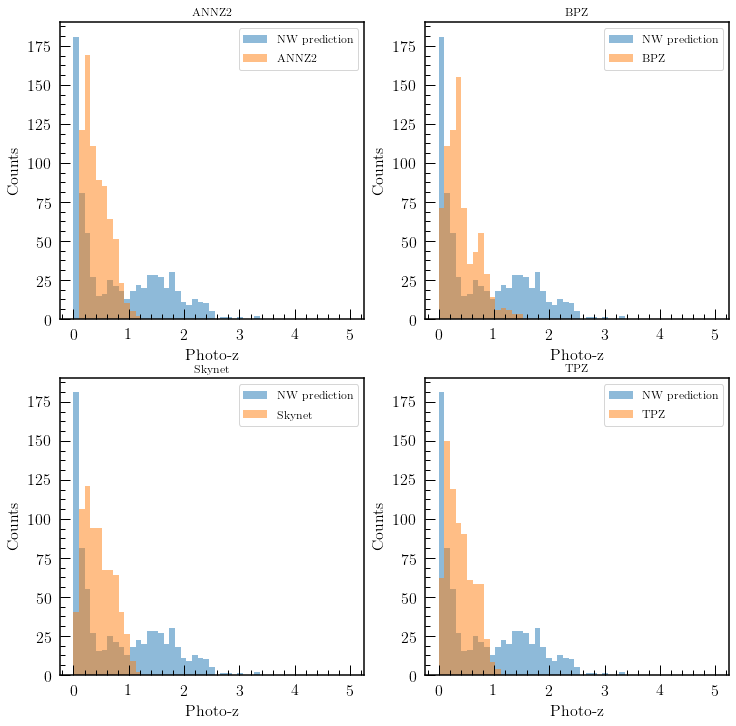

In [22]:
bins_photz = np.linspace(0,5,50)
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.hist(pred_annz, bins_photz, alpha=0.5, label='NW prediction')
plt.hist(DesZs_annz, bins_photz, alpha=0.5, label='ANNZ2')
plt.xlabel('Photo-z')
plt.ylabel('Counts')
plt.title('ANNZ2')
plt.legend(loc=1)
plt.subplot(222)
plt.hist(pred_annz, bins_photz, alpha=0.5, label='NW prediction')
plt.hist(DesZs_bpz, bins_photz, alpha=0.5, label='BPZ')
plt.xlabel('Photo-z')
plt.ylabel('Counts')
plt.title('BPZ')
plt.legend(loc=1)
plt.subplot(223)
plt.hist(pred_annz, bins_photz, alpha=0.5, label='NW prediction')
plt.hist(DesZs_skynet, bins_photz, alpha=0.5, label='Skynet')
plt.xlabel('Photo-z')
plt.ylabel('Counts')
plt.title('Skynet')
plt.legend(loc=1)
plt.subplot(224)
plt.hist(pred_annz, bins_photz, alpha=0.5, label='NW prediction')
plt.hist(DesZs_tpz, bins_photz, alpha=0.5, label='TPZ')
plt.xlabel('Photo-z')
plt.ylabel('Counts')
plt.title('TPZ')
plt.legend(loc=1)

Above histograms show the distributions of the 4 DES photo-z methods overlaid on the distribution of our Nadaraya-Watson photo-z estimate. The respective DES method is in orange, with our NW method in blue.   

In [ ]:
#empty arrays for object classification 
stars_annz = np.empty(shape=(0,3))
gals_annz = np.empty(shape=(0,3))
uns_annz = np.empty(shape=(0,3))
#loop through and sort objects based on des object class
for i in range(len(ModestClass_annz)):
    if ModestClass_annz[i] == 2:
        stars_annz = np.append(stars_annz, [[pred_annz[i], DesZs_annz[i], y_test_annz[i]]], axis = 0)
    elif ModestClass_annz[i] == 1:
        gals_annz = np.append(gals_annz, [[pred_annz[i], DesZs_annz[i], y_test_annz[i]]], axis = 0)
    else:
        uns_annz = np.append(uns_annz, [[pred_annz[i], DesZs_annz[i], y_test_annz[i]]], axis = 0)

In [ ]:
stars_bpz = np.empty(shape=(0,3))
gals_bpz = np.empty(shape=(0,3))
uns_bpz = np.empty(shape=(0,3))
for i in range(len(ModestClass_bpz)):
    if ModestClass_bpz[i] == 2:
        stars_bpz = np.append(stars_bpz, [[pred_bpz[i], DesZs_bpz[i], y_test_bpz[i]]], axis = 0)
    elif ModestClass_bpz[i] == 1:
        gals_bpz = np.append(gals_bpz, [[pred_bpz[i], DesZs_bpz[i], y_test_bpz[i]]], axis = 0)
    else:
        uns_bpz = np.append(uns_bpz, [[pred_bpz[i], DesZs_bpz[i], y_test_bpz[i]]], axis = 0)

In [ ]:
stars_skynet = np.empty(shape=(0,3))
gals_skynet = np.empty(shape=(0,3))
uns_skynet = np.empty(shape=(0,3))
for i in range(len(ModestClass_skynet)):
    if ModestClass_skynet[i] == 2:
        stars_skynet = np.append(stars_skynet, [[pred_skynet[i], DesZs_skynet[i], y_test_skynet[i]]], axis = 0)
    elif ModestClass_skynet[i] == 1:
        gals_skynet = np.append(gals_skynet, [[pred_skynet[i], DesZs_skynet[i], y_test_skynet[i]]], axis = 0)
    else:
        uns_skynet = np.append(uns_skynet, [[pred_skynet[i], DesZs_skynet[i], y_test_skynet[i]]], axis = 0)

In [ ]:
stars_tpz = np.empty(shape=(0,3))
gals_tpz = np.empty(shape=(0,3))
uns_tpz = np.empty(shape=(0,3))
for i in range(len(ModestClass_tpz)):
    if ModestClass_tpz[i] == 2:
        stars_tpz = np.append(stars_tpz, [[pred_tpz[i], DesZs_tpz[i], y_test_tpz[i]]], axis = 0)
    elif ModestClass_tpz[i] == 1:
        gals_tpz = np.append(gals_tpz, [[pred_tpz[i], DesZs_tpz[i], y_test_tpz[i]]], axis = 0)
    else:
        uns_tpz = np.append(uns_tpz, [[pred_tpz[i], DesZs_tpz[i], y_test_tpz[i]]], axis = 0)